Sentiment analysis for 'freedoms'.

In [1]:
import pandas as pd
import csv
import string
import scipy as sp
from scipy import stats
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

On the sentiments of three sorts of freedoms: freedom to, freedom from, and freedom of from BYU's corpi of early English (COFEA), SCOTUS opinions (COSCOUS), and U.S. Legal Code (COCUSC) DO NOW TOO

Defining dictionaries for the three varieties of "freedom:"

In [ ]:
tos = {}
froms = {}
ofs = {}

Isolates the sentence around the occurence of the match (case-insensitive 'freedom' in our cases):

In [ ]:
def sentence_of(line):
    sentence = ""
    left = line[0]
    right = line[2]
    sentence += left[left.rfind(".") + 1: ]
    sentence += line[1]
    sentence += right[:right.find(".") + 1]
    return sentence                   

Isolates the complement to 'freedom':

In [ ]:
def complement_of(line):
  complement = line[2]
  return complement[:complement.find(".") + 1]

Tokenization:

In [ ]:
def simple_tokenize(s):
    punct = string.punctuation
    final_toks = []
    toks = s.lower().strip().split()
    for w in toks:
        final_toks.append(w.strip(punct))
    return final_toks

Splits occurrences of freedom by the word that follows:

In [ ]:
def split_by_sort(filename):
    with open(filename) as f:
        tos[filename] = []
        froms[filename] = []
        ofs[filename] = []
        for line in csv.reader(f):
            words_after = simple_tokenize(line[2])
            if words_after[0] == "to":
                tos[filename].append(sentence_of(line))
            elif words_after[0] == "from":
                froms[filename].append(sentence_of(line))
            elif words_after[0] == "of":
                ofs[filename].append(sentence_of(line))

In [ ]:
def split_sort_complements(filename):
    with open(filename) as f:
        tos[filename] = []
        froms[filename] = []
        ofs[filename] = []
        for line in csv.reader(f):
            words_after = simple_tokenize(line[2])
            if words_after[0] == "to":
                tos[filename].append(complement_of(line))
            elif words_after[0] == "from":
                froms[filename].append(complement_of(line))
            elif words_after[0] == "of":
                ofs[filename].append(complement_of(line))

Building a dataframe from the sentiment data:

In [ ]:
sentiment_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Warriner_et_al emot ratings.csv', index_col='Word')
sentiment_df = sentiment_df[['V.Mean.Sum', 'A.Mean.Sum', 'D.Mean.Sum']]

sentiment_df = sentiment_df.rename(
    columns={'V.Mean.Sum': 'Valence',
             'A.Mean.Sum': 'Arousal',
             'D.Mean.Sum': 'Dominance'})

Isolates the sentiment of a given word:

In [ ]:
def sentiment_of_word(word, col):
    if word in sentiment_df[col]:
        return sentiment_df.loc[word][col]
    return -1

Averages the sentiments of all words in a line:

In [ ]:
def sentiment_of_line(sentence, col):
    words = simple_tokenize(sentence)
    wc, num = 0, 0
    for w in words:
        s = sentiment_of_word(w, col)
        #add age of acquisition of word to numerator, if statement for some NaN values
        if not pd.isnull(s) and s > -1:
            num += s
            wc += 1
    if wc == 0:
        return 0
    return num/wc

In [ ]:
def line_sentiment_il(whole, line, col): #this version takes a list and computes for the index provided
    words = simple_tokenize(whole[line])
    wc, num = 0, 0
    for w in words:
        s = sentiment_of_word(w, col)
        #add age of acquisition of word to numerator, if statement for some NaN values
        if not pd.isnull(s) and s > -1:
            num += s
            wc += 1
    if wc == 0:
        return 0
    return num/wc

Tallies the average sentiments for each statistic:

In [ ]:
def tally_sentiment(filename, tos, froms, ofs):

    toV, toA, toD, fromV, fromA, fromD, ofV, ofA, ofD = 0, 0, 0, 0, 0, 0, 0, 0, 0
    for l in tos[filename]:
        toV += sentiment_of_line(l, 'Valence')
        toA += sentiment_of_line(l, 'Arousal')
        toD += sentiment_of_line(l, 'Dominance')
    for l in froms[filename]:
        fromV += sentiment_of_line(l, 'Valence')
        fromA += sentiment_of_line(l, 'Arousal')
        fromD += sentiment_of_line(l, 'Dominance')
    for l in ofs[filename]:
        ofV += sentiment_of_line(l, 'Valence')
        ofA += sentiment_of_line(l, 'Arousal')
        ofD += sentiment_of_line(l, 'Dominance')
    return {'to': {'Valence': toV/len(tos[filename]), 'Arousal': toA/len(tos[filename]), 'Dominance': toD/len(tos[filename])},
         'of': {'Valence': ofV/len(ofs[filename]), 'Arousal': ofA/len(ofs[filename]), 'Dominance': ofD/len(ofs[filename])},
         'from': {'Valence': fromV/len(froms[filename]), 'Arousal': fromA/len(froms[filename]), 'Dominance': fromD/len(froms[filename])}}

Computes the above for each of three test files:

In BYU's database of 'freedom' incidents from COFEA, sentiment analysis reveals the following pattern:

                 to        of      from
Valence    3.990992  4.306697  4.040335
Arousal    2.874358  3.060089  3.481714
Dominance  3.980968  4.279101  4.191340





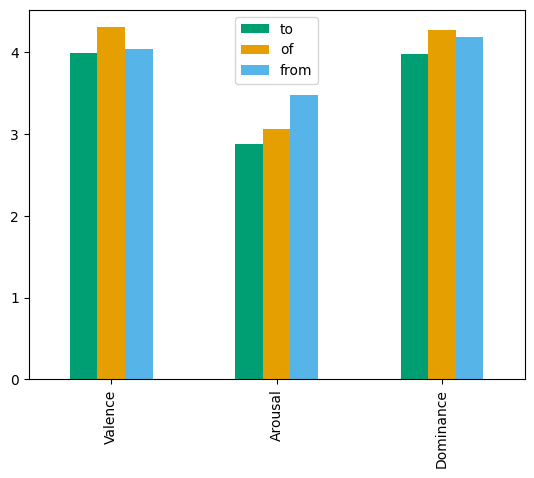

In [ ]:
coscous = "/content/gdrive/My Drive/Colab Notebooks/coscousMod.csv"
cofeaL = "/content/gdrive/My Drive/Colab Notebooks/cofeaLegal.csv"
cofeaNL = "/content/gdrive/My Drive/Colab Notebooks/cofeaNonLegal.csv"
now = "/content/gdrive/My Drive/Colab Notebooks/now.csv"
cofea = "/content/gdrive/My Drive/Colab Notebooks/cofea.csv"
for filename in [cofea]:
    split_sort_complements(filename)
    d = {}
    d[filename] = tally_sentiment(filename, tos, froms, ofs)
    df = pd.DataFrame.from_dict(d[filename])
    print("In BYU's database of \'freedom\' incidents from %s, sentiment analysis reveals the following pattern:\n" % filename.replace(".csv","").upper().replace("/CONTENT/GDRIVE/MY DRIVE/COLAB NOTEBOOKS/", ""))
    print(df)
    df.plot.bar(color=["#009E73", "#E69F00","#56B4E9", "#D55E00"])
    print("\n\n")

In the above, we see that 'to' freedoms have greater valence and lesser arousal than 'from' freedoms which could mean that they are more positive, but less extreme freedoms. Since freedoms _from_ oppression often feature negative language about the horror of oppression, but excercising freedoms _to_ certain behaviors often discuss the merits of these less important rights, this is not surprising.

Below are the transformations of earlier data into usable (if very dense) lists of sentiments. Had I known I wanted this information, I might have executed the entire program with these lists, but storing less data and calculating an average was preferable for all of the earlier analysis. 

In [ ]:
coscousToV = list(map(lambda i:line_sentiment_il(tos[coscous], i, 'Valence'), range(0, len(tos[coscous]))))
coscousToA = list(map(lambda i:line_sentiment_il(tos[coscous], i, 'Arousal'), range(0, len(tos[coscous]))))
coscousToD = list(map(lambda i:line_sentiment_il(tos[coscous], i, 'Dominance'), range(0, len(tos[coscous]))))
coscousOfV = list(map(lambda i:line_sentiment_il(ofs[coscous], i, 'Valence'), range(0, len(ofs[coscous]))))
coscousOfA = list(map(lambda i:line_sentiment_il(ofs[coscous], i, 'Arousal'), range(0, len(ofs[coscous]))))
coscousOfD = list(map(lambda i:line_sentiment_il(ofs[coscous], i, 'Dominance'), range(0, len(ofs[coscous]))))
coscousFromV = list(map(lambda i:line_sentiment_il(froms[coscous], i, 'Valence'), range(0, len(froms[coscous]))))
coscousFromA = list(map(lambda i:line_sentiment_il(froms[coscous], i, 'Arousal'), range(0, len(froms[coscous]))))
coscousFromD = list(map(lambda i:line_sentiment_il(froms[coscous], i, 'Dominance'), range(0, len(froms[coscous]))))

#cofea Legal
cofeaToV = list(map(lambda i:line_sentiment_il(tos[cofea], i, 'Valence'), range(0, len(tos[cofea]))))
cofeaToA = list(map(lambda i:line_sentiment_il(tos[cofea], i, 'Arousal'), range(0, len(tos[cofea]))))
cofeaToD = list(map(lambda i:line_sentiment_il(tos[cofea], i, 'Dominance'), range(0, len(tos[cofea]))))
cofeaOfV = list(map(lambda i:line_sentiment_il(ofs[cofea], i, 'Valence'), range(0, len(ofs[cofea]))))
cofeaOfA = list(map(lambda i:line_sentiment_il(ofs[cofea], i, 'Arousal'), range(0, len(ofs[cofea]))))
cofeaOfD = list(map(lambda i:line_sentiment_il(ofs[cofea], i, 'Dominance'), range(0, len(ofs[cofea]))))
cofeaFromV = list(map(lambda i:line_sentiment_il(froms[cofea], i, 'Valence'), range(0, len(froms[cofea]))))
cofeaFromA = list(map(lambda i:line_sentiment_il(froms[cofea], i, 'Arousal'), range(0, len(froms[cofea]))))
cofeaFromD = list(map(lambda i:line_sentiment_il(froms[cofea], i, 'Dominance'), range(0, len(froms[cofea]))))

#now
nowToV = list(map(lambda i:line_sentiment_il(tos[now], i, 'Valence'), range(0, len(tos[now]))))
nowToA = list(map(lambda i:line_sentiment_il(tos[now], i, 'Arousal'), range(0, len(tos[now]))))
nowToD = list(map(lambda i:line_sentiment_il(tos[now], i, 'Dominance'), range(0, len(tos[now]))))
nowOfV = list(map(lambda i:line_sentiment_il(ofs[now], i, 'Valence'), range(0, len(ofs[now]))))
nowOfA = list(map(lambda i:line_sentiment_il(ofs[now], i, 'Arousal'), range(0, len(ofs[now]))))
nowOfD = list(map(lambda i:line_sentiment_il(ofs[now], i, 'Dominance'), range(0, len(ofs[now]))))
nowFromV = list(map(lambda i:line_sentiment_il(froms[now], i, 'Valence'), range(0, len(froms[now]))))
nowFromA = list(map(lambda i:line_sentiment_il(froms[now], i, 'Arousal'), range(0, len(froms[now]))))
nowFromD = list(map(lambda i:line_sentiment_il(froms[now], i, 'Dominance'), range(0, len(froms[now]))))


In [ ]:
toV = coscousToV + cofeaToV + nowToV
toA = coscousToA + cofeaToA + nowToA
fromV = coscousFromV + cofeaFromV + nowFromV
fromA = coscousFromA + cofeaFromA + nowFromA
print(fromV)
print('general to v from p-values:')
print('p-value for to and from Valence: ', sp.stats.ttest_ind(toV, fromV, nan_policy='omit')[1])
print('p-value for to and from Arousal: ', sp.stats.ttest_ind(toA, fromA, nan_policy='omit')[1])

[5.640000000000001, 5.361666666666667, 3.85, 5.41, 3.6566666666666667, 3.625, 4.23, 4.65, 4.98, 4.502000000000001, 4.74, 5.1275, 2.8699999999999997, 4.4350000000000005, 5.735, 5.090714285714285, 5.595, 5.065833333333334, 5.5, 5.065833333333334, 5.435833333333332, 5.029999999999999, 4.46, 5.33, 5.266, 5.640000000000001, 0, 0, 6.33, 6.243333333333333, 5.224615384615384, 5.4750000000000005, 4.095, 7.53, 4.885, 5.5633333333333335, 4.76, 5.244, 0, 0, 4.638888888888889, 4.875, 4.875, 0, 0, 0, 6.452000000000001, 5.83875, 5.743333333333333, 0, 5.406666666666666, 5.7, 0, 4.989999999999999, 5.204285714285715, 6.26, 5.333333333333333, 6.335, 4.6274999999999995, 3.7380000000000004, 3.5450000000000004, 4.64, 4.905, 4.836666666666667, 6.14, 5.27, 3.815, 4.691428571428571, 5.645384615384615, 0, 6.26, 0, 0, 5.59, 5.69625, 6.26, 0, 4.48, 3.63, 5.115, 0, 5.708, 5.144, 4.74, 5.4275, 3.8875, 5.3500000000000005, 6.24, 5.71, 3.47, 5.113333333333333, 5.34, 6.355, 6.046666666666667, 6.426666666666667, 5.73, 5

And now, calculations of the statistical significance of some striking comparisons:

In [ ]:



print('Selected Valence p-values:')
print('p-value for coscous to and from Valence: ', sp.stats.ttest_ind(coscousToV, coscousFromV, nan_policy='omit')[1])
print('p-value for coscous of and from Valence: ', sp.stats.ttest_ind(coscousOfV, coscousFromV, nan_policy='omit')[1])
print('p-value for cofea legal to and from Valence: ', sp.stats.ttest_ind(cofeaToV, cofeaFromV, nan_policy='omit')[1])
print('p-value for now to and from Valence: ', sp.stats.ttest_ind(nowToV, nowFromV, nan_policy='omit')[1])
print('\n')
print('Selected Arousal p-values:')
print('p-value for coscous to and from Arousal: ', sp.stats.ttest_ind(coscousToA, coscousFromA, nan_policy='omit')[1])
print('p-value for cofea legal to and from Arousal: ', sp.stats.ttest_ind(cofeaToA, cofeaFromA, nan_policy='omit')[1])
print('p-value for now to and from Arousal: ', sp.stats.ttest_ind(nowToA, nowFromA, nan_policy='omit')[1])
print('\n')
print('Selected \'To\' p-values:')
print('p-value for \'To\' freedoms from COFEA and coscous Arousal: ', sp.stats.ttest_ind(cofeaToA, coscousToA, nan_policy='omit')[1])
print('p-value for \'To\' freedoms from COFEA and coscous Valence: ', sp.stats.ttest_ind(cofeaToV, coscousToV, nan_policy='omit')[1])
print('p-value for \'To\' freedoms from now and coscous Arousal: ', sp.stats.ttest_ind(nowToA, coscousToA, nan_policy='omit')[1])
print('p-value for \'To\' freedoms from now and coscous Valence: ', sp.stats.ttest_ind(nowToV, coscousToV, nan_policy='omit')[1])
print('p-value for \'To\' freedoms from COFEA NL and now Arousal: ', sp.stats.ttest_ind(cofeaToA, nowToA, nan_policy='omit')[1])
print('p-value for \'To\' freedoms from COFEA NL and now Valence: ', sp.stats.ttest_ind(cofeaToV, nowToV, nan_policy='omit')[1])
print('\n')
print('Selected \'From\' p-values:')
print('p-value for \'From\' freedoms from COFEA and coscous Arousal: ', sp.stats.ttest_ind(cofeaFromA, coscousFromA, nan_policy='omit')[1])
print('p-value for \'From\' freedoms from COFEA and coscous Valence: ', sp.stats.ttest_ind(cofeaFromV, coscousFromV, nan_policy='omit')[1])
print('p-value for \'From\' freedoms from now and COSCOUS Arousal: ', sp.stats.ttest_ind(nowFromA, coscousFromA, nan_policy='omit')[1])
print('p-value for \'From\' freedoms from now and COSCOUS Valence: ', sp.stats.ttest_ind(nowFromV, coscousFromV, nan_policy='omit')[1])
print('p-value for \'From\' freedoms from cofea NL and now Arousal: ', sp.stats.ttest_ind(cofeaFromA, nowFromA, nan_policy='omit')[1])
print('p-value for \'From\' freedoms from cofea NL and now Valence: ', sp.stats.ttest_ind(cofeaFromV, nowFromV, nan_policy='omit')[1])


Selected Valence p-values:
p-value for coscous to and from Valence:  0.18923634604746759
p-value for coscous of and from Valence:  5.9581138681417896e-05
p-value for cofea legal to and from Valence:  0.782296881594184
p-value for now to and from Valence:  0.7486433021001613


Selected Arousal p-values:
p-value for coscous to and from Arousal:  0.1293774082906775
p-value for cofea legal to and from Arousal:  5.949920977556192e-06
p-value for now to and from Arousal:  0.7096580699183018


Selected 'To' p-values:
p-value for 'To' freedoms from COFEA and coscous Arousal:  0.002326866691672326
p-value for 'To' freedoms from COFEA and coscous Valence:  0.0014939384211527173
p-value for 'To' freedoms from now and coscous Arousal:  0.020635523722815387
p-value for 'To' freedoms from now and coscous Valence:  0.012675064115181213
p-value for 'To' freedoms from COFEA NL and now Arousal:  0.3024618739400551
p-value for 'To' freedoms from COFEA NL and now Valence:  0.3313960216700571


Selected 'F

The hypothesized largest difference _does_ exhibit the most significant difference with a 2-sided p-value < 0.0005 in valence both in Supreme Court language and early English, but not in the U.S. legal code. In general, COCUSC (Supreme Court language) and COSCOUS (U.S. Code) have the most in common (which makes sense given they're more contemporary uses of 'to' and 'from' while COFEA (early English) poses some interesting contrasts with each among different comparisons of valence/arousal and variety of freedom. It may be worth continued evaluation to see what we can learn about the intent of these freedoms.